In [164]:
library(tidyverse)
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}

# Review of grammar of graphics (gg)

I have a dataframe 

In [165]:
library(nycflights13)
flights %>% head
    

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [144]:
str(flights)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	336776 obs. of  19 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : num  227 227 160 183 116 150 158 53 140 138 ...
 $ distanc

I assign columns of the dataframe to aspects of the plot

Warning message:
“Removed 8255 rows containing missing values (geom_point).”

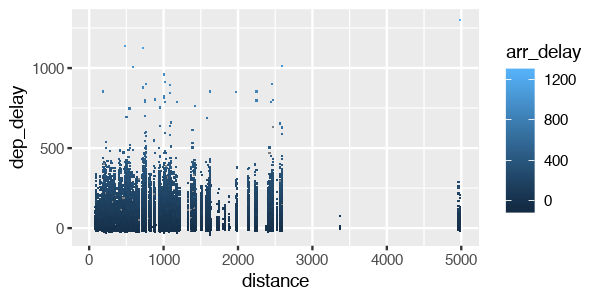

In [173]:
fig.size(2.5, 5)
ggplot(
    data = flights, 
    mapping = aes(x = distance, y = dep_delay, color = arr_delay)
) +
    geom_point(shape = '.')


Then we can modify the appearance of each mapped variable. 

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 191830 rows containing missing values (geom_point).”

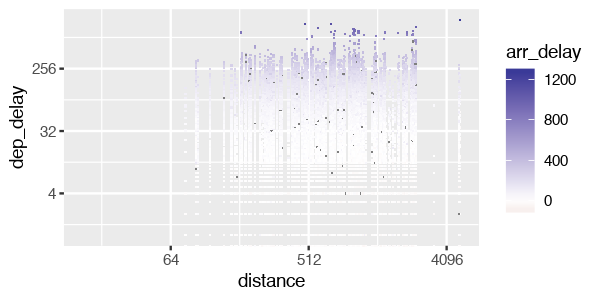

In [174]:
fig.size(2.5, 5)
ggplot(
    data = flights, 
    mapping = aes(x = distance, y = dep_delay, color = arr_delay)
) +
    geom_point(shape = '.') + 
    scale_color_gradient2() + 
    scale_x_continuous(trans = 'log2') + 
    scale_y_continuous(trans = 'log2') + 
    NULL

# Pipe operator 

![title](magrittr.jpeg)

In [175]:
x <- 10

In [177]:
(((x + 5) * 2) + 10) - 5

[1] 35

In [178]:
sum(sum(prod(sum(x, 5), 2), 10), -5)

[1] 35

In [179]:
x %>% 
    sum(5) %>% 
    prod(2) %>% 
    sum(10) %>% 
    sum(-5)

[1] 35

In [186]:
# ?magrittr::`%>%`

In [191]:
foo <- function(data_df, data_vec) {
    return(c(nrow(data_df), length(data_vec)))
}

In [192]:
data.frame(x = 1:5, y = 1:5) %>% 
    foo(1:10)


[1]  5 10

# Filtering observations

In [193]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [230]:
flights %>% 
    filter(month == 1 & day == 1) %>% 
    head


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [235]:
jan1 <- flights %>% 
    filter(month == 1 & day == 1)

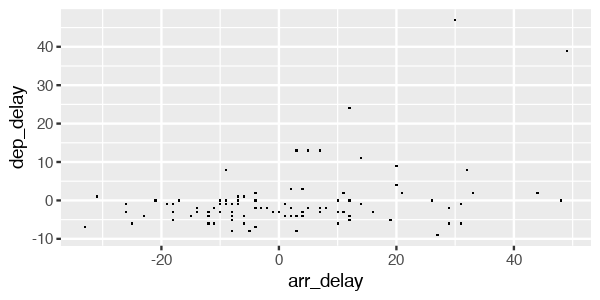

In [239]:
(plt <- flights %>% 
    head(100) %>% 
    ggplot(aes(arr_delay, dep_delay)) + geom_point(shape = '.'))

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

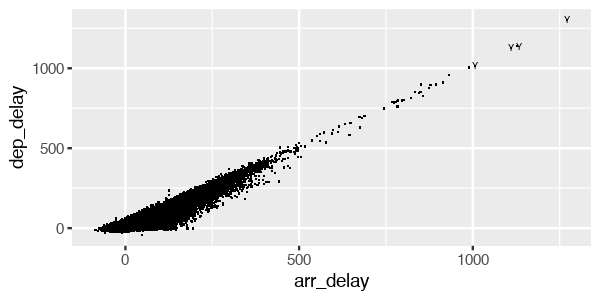

In [282]:
flights %>% 
    mutate(x = arr_delay * 5) %>% 
    ggplot(aes(arr_delay, dep_delay)) + 
        geom_point(shape = '.') + 
        geom_jitter(shape = 'Y', data = . %>% subset(x > 5000))

## Common errors

In [240]:
filter(flights, month = 1)

ERROR: `month` (`month = 1`) must not be named, do you need `==`?

In [253]:
sqrt(2) ^ 2 == 2
1 / 49 * 49 == 1

[1] FALSE

[1] FALSE

In [252]:
abs(2 - (sqrt(2) ^ 2)) > sqrt(.Machine$double.eps)

[1] FALSE

In [255]:
near(sqrt(2) ^ 2,  2)
near(1 / 49 * 49, 1)

[1] TRUE

[1] TRUE

In [256]:
NA > 5
10 == NA
NA + 10
NA / 2
NA == NA

[1] NA

[1] NA

[1] NA

[1] NA

[1] NA

In [ ]:
# Let x be Mary's age. We don't know how old she is.
x <- NA

# Let y be John's age. We don't know how old he is.
y <- NA

# Are John and Mary the same age?
x == y
# We don't know!


In [259]:
## the right way 
is.na(NA)

[1] TRUE

In [265]:
flights %>% 
    filter(is.na(dep_time)) %>% 
    nrow

[1] 8255

`filter()` only includes rows where the condition is `TRUE`; it excludes both `FALSE` and `NA` values. If you want to preserve missing values, ask for them explicitly:

In [ ]:
df <- tibble(x = c(1, NA, 3))
filter(df, x > 1)
filter(df, is.na(x) | x > 1)

## Multiple criteria with boolean operators 

In [266]:
filter(flights, month == 11 | month == 12) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


In [267]:
nov_dec <- filter(flights, month %in% c(11, 12))

In [ ]:
filter(flights, !(arr_delay > 120 | dep_delay > 120)) %>% head()
filter(flights, arr_delay <= 120, dep_delay <= 120) %>% head()

## Exercises

In [284]:
flights %>% 
    filter(month == 1 | month == 2 | month == 3) %>% 
    head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


# Selecting variables

In [288]:
# Select columns by name
flights %>% 
    select(year, month, day) %>% head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [289]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [290]:
# Select all columns between year and day (inclusive)
select(flights, year:arr_delay) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
2013,1,1,517,515,2,830,819,11
2013,1,1,533,529,4,850,830,20
2013,1,1,542,540,2,923,850,33
2013,1,1,544,545,-1,1004,1022,-18
2013,1,1,554,600,-6,812,837,-25
2013,1,1,554,558,-4,740,728,12


In [291]:
# Select all columns except those from year to day (inclusive)
select(flights, -(year:day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Another option is to use `select()` in conjunction with the `everything()` helper. This is useful if you have a handful of variables you'd like to move to the start of the data frame.

In [294]:
select(flights, time_hour, air_time, everything()) %>% head()

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


`select()` can be used to rename variables, but it's rarely useful because it drops all of the variables not explicitly mentioned. Instead, use `rename()`, which is a variant of `select()` that keeps all the variables that aren't explicitly mentioned:

In [295]:
select(flights, YEAR = year, DAY = day, MONTH = month, everything()) %>% head()

YEAR,DAY,MONTH,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [296]:
rename(flights, YEAR = year, DAY = day, MONTH = month) %>% head()

YEAR,MONTH,DAY,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
vars <- c("year", "month", "day", "dep_delay", "arr_delay")

## Some basics for regular expressions

# Modifying variables

Besides selecting sets of existing columns, it's often useful to add new columns that are functions of existing columns. That's the job of `mutate()`. 

In [297]:
flights %>% select(
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
) %>% 
mutate(
  gain = dep_delay - arr_delay,
  speed = distance / air_time * 60
) %>% 
    head()


year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,370.0441
2013,1,1,4,20,1416,227,-16,374.2731
2013,1,1,2,33,1089,160,-31,408.3750
2013,1,1,-1,-18,1576,183,17,516.7213
2013,1,1,-6,-25,762,116,19,394.1379
2013,1,1,-4,12,719,150,-16,287.6000


If you only want to keep the new variables, use `transmute()`:


In [298]:
flights %>% transmute(
  gain = dep_delay - arr_delay,
  hours = air_time / 60,
  gain_per_hour = gain / hours
) %>% 
    head()


gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


## Useful mutate functions

In [42]:
transmute(flights,
    dep_time,
    hour = dep_time %/% 100,
    minute = dep_time %% 100
) %>% 
    head()


dep_time,hour,minute
<int>,<dbl>,<dbl>
517,5,17
533,5,33
542,5,42
544,5,44
554,5,54
554,5,54


In [48]:
(x <- 1:10)
lag(x)
x - lag(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] NA  1  2  3  4  5  6  7  8  9

[1] NA  1  1  1  1  1  1  1  1  1

In [45]:
x
cumsum(x)
cummean(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  3  6 10 15 21 28 36 45 55

[1] 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5

In [303]:
flights %>% 
    mutate(was_late = case_when(
        arr_delay < -5 ~ -1,
        arr_delay < 0 ~ 0,
        TRUE ~ arr_delay
    )) %>% 
    head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,was_late
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,11
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,20
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,33
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,0
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,0
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,12


# Grouped summaries

The last key verb is `summarise()`. It collapses a data frame to a single row:


In [304]:
summarise(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907


`summarise()` is not terribly useful unless we pair it with `group_by()`. This changes the unit of analysis from the complete dataset to individual groups. Then, when you use the dplyr verbs on a grouped data frame they'll be automatically applied "by group". For example, if we applied exactly the same code to a data frame grouped by date, we get the average delay per date:


In [78]:
by_day <- group_by(flights, year, month, day)
summarise(by_day, delay = mean(dep_delay, na.rm = TRUE)) %>% head

year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


*paradigm*: group_by() %>% summarise() %>% ungroup()

In [305]:
delays <- flights %>% 
    group_by(dest) %>% 
    summarise(
#         count = n(),
        dist = mean(distance, na.rm = TRUE)
#         delay = mean(arr_delay, na.rm = TRUE)
    ) %>% 
    ungroup()

head(delays)

dest,dist
<chr>,<dbl>
ABQ,1826.0000
ACK,199.0000
ALB,143.0000
ANC,3370.0000
ATL,757.1082
AUS,1514.2530


## Ranking within groups

In [146]:
flights %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [306]:
flights %>% 
    top_n(5, arr_delay)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00


Also arrange by arrival delay

In [157]:
flights %>% 
    top_n(5, arr_delay) %>% 
    dplyr::arrange(arr_delay)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00


But in descending order

In [159]:
flights %>% 
    top_n(5, arr_delay) %>% 
    dplyr::arrange(desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00


In [307]:
flights %>% 
    filter(tailnum %in% c('N619AA', 'N807AW')) %>% 
    group_by(tailnum) %>% 
    top_n(5, arr_delay) %>% 
    ungroup() %>% 
    arrange(tailnum, desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,24,1411,1245,86,1709,1550,79,AA,2041,N619AA,JFK,MIA,142,1089,12,45,2013-07-24 12:00:00
2013,2,8,929,900,29,1307,1220,47,AA,647,N619AA,JFK,MIA,157,1089,9,0,2013-02-08 09:00:00
2013,11,1,701,655,6,954,920,34,AA,1263,N619AA,JFK,LAS,306,2248,6,55,2013-11-01 06:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,7,28,551,540,11,908,840,28,AA,701,N619AA,JFK,MIA,154,1089,5,40,2013-07-28 05:00:00
2013,1,1,622,630,-8,1017,1014,3,US,245,N807AW,EWR,PHX,342,2133,6,30,2013-01-01 06:00:00
2013,1,6,627,630,-3,947,1014,-27,US,245,N807AW,EWR,PHX,299,2133,6,30,2013-01-06 06:00:00


# Tidy data 

Let's try to plot population of each country by year

In [81]:
table4b

country,1999,2000
<chr>,<int>,<int>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


In [109]:
data_tidy <- table4b %>% 
  gather(key = year, value = population, `1999`, `2000`)
data_tidy

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


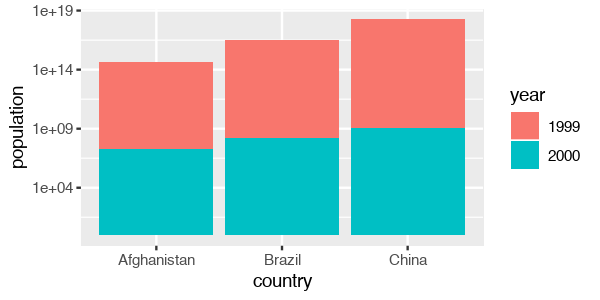

In [115]:
data_tidy %>% 
    ggplot(aes(x = country, y = population, fill = year)) + 
        geom_bar(stat = 'identity') + 
        scale_y_log10()

Selecting columns to gather

In [129]:
## gather all columns
table4b %>% 
  gather(key = year, value = population)

year,population
<chr>,<chr>
country,Afghanistan
country,Brazil
country,China
1999,19987071
1999,172006362
1999,1272915272
2000,20595360
2000,174504898
2000,1280428583


In [130]:
## select which columnns to gather
table4b %>% 
  gather(key = year, value = population, `1999`, `2000`)

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


In [131]:
## select which columns to leave out
table4b %>% 
  gather(key = year, value = population, -country)

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


Now let's spread it out again

In [132]:
data_tidy %>% 
    spread(key = year, value = population)

country,1999,2000
<chr>,<int>,<int>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


Common issue: my dataframe doesn't have a country column but it does have rownames

In [140]:
data_df <- data.frame(table4b)
row.names(data_df) <- table4b$country
data_df$country <- NULL
data_df

,X1999,X2000
,<int>,<int>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


In [141]:
data_df %>% 
    tidyr::gather(year, population)

year,population
<chr>,<int>
X1999,19987071
X1999,172006362
X1999,1272915272
X2000,20595360
X2000,174504898
X2000,1280428583


In [143]:
data_df %>% 
    tibble::rownames_to_column('country') %>% 
    tidyr::gather(year, population, -country)

country,year,population
<chr>,<chr>,<int>
Afghanistan,X1999,19987071
Brazil,X1999,172006362
China,X1999,1272915272
Afghanistan,X2000,20595360
Brazil,X2000,174504898
China,X2000,1280428583
